# Stationary bandit problem

In this section we execute K-bandit problems, using n=10 (number of "arms").
The different values of *epsilon* indicate the level of exploration (0 corresponding with the greedy approach).

With each epsilon value, 2000 problems of 1000 steps each are executed, and then the results are averaged in each step for the 2000 problems.

In [1]:
from kbandit import generate_kbandit, run_problem
from matplotlib import pyplot as plt

In [2]:
rewards, best_actions = [], []
epsilons = (0.0, 0.1, 0.01)
for epsilon in epsilons:
    # Generate kbandit problems of 10 arms
    factory = lambda: generate_kbandit(10)
    reward, best_action = run_problem(steps=1000, n=2000, epsilon=epsilon, problem_factory=factory)
    rewards.append(reward)
    best_actions.append(best_action)

Epsilon: 0.0
Epsilon: 0.1
Epsilon: 0.01


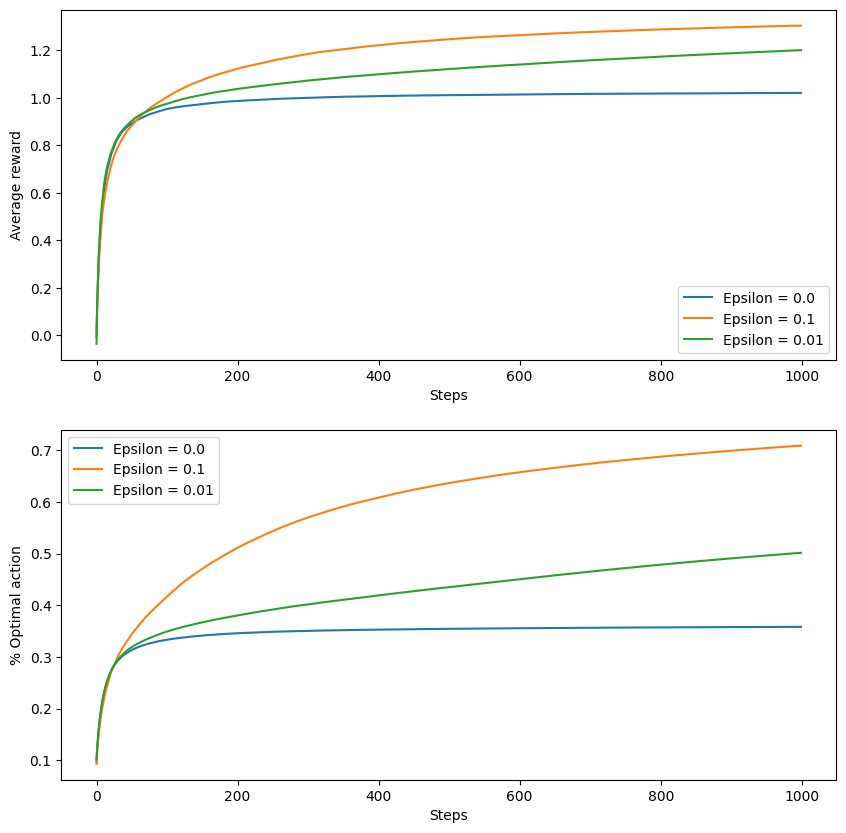

In [3]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.xlabel("Steps")
plt.ylabel("Average reward")
for reward, epsilon in zip(rewards, epsilons):
    plt.plot(reward, label=f"Epsilon = {epsilon}")
plt.legend()

plt.subplot(212)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
for best_action, epsilon in zip(best_actions, epsilons):
    plt.plot(best_action, label=f"Epsilon = {epsilon}")

plt.legend()
plt.show()